## Environment

In [57]:
!python --version

Python 3.8.3


## Read data

In [58]:
with open("./search_time_2_50","r") as search_time_2_50:
    search_time_list = search_time_2_50.read().splitlines()

with open("./search_time_50_60","r") as search_time_50_60:
    search_time_list_50_60 = search_time_50_60.read().splitlines()

with open("./search_time_2_80","r") as seach_time_2_80:
    search_time_list_2_80_single_graph = seach_time_2_80.read().splitlines()

with open("./fast_newman_allgrpah_time.txt","r") as fast_newman_time:
    fast_newman_allgraph_time_2_60 = fast_newman_time.read().splitlines() 

with open("./fast_newman_singlegraph_time.txt","r") as fast_newman_time:
    fast_newman_singlegraph_time_2_80 = fast_newman_time.read().splitlines() 

## Data Processing

In [59]:
def get_HT_BPT(search_time_list):
    HT_times=[]
    BPT_times=[]
    qubit_numbers=[]
    for i in search_time_list:
        qubit_number = int(i.split(":")[0])
        HT_time = float(i.split(":")[1].split("_")[0])
        BPT_time = float(i.split(":")[1].split("_")[1])
        qubit_numbers.append(qubit_number)
        HT_times.append(HT_time*100)
        BPT_times.append(BPT_time)
    return HT_times,BPT_times,qubit_numbers
def get_F(fast_newman_time):
    F_times=[]
    qubit_numbers=[]
    for i in fast_newman_time:
        qubit_number = int(i.split(":")[0])
        F_time = float(i.split(":")[1])
        qubit_numbers.append(qubit_number)
        F_times.append(F_time)
    return F_times,qubit_numbers

In [60]:
qubit_numbers = []
F_time = []
HT_times = []
BPT_times = []
for i in search_time_list:
    qubit_number = int(i.split(":")[0])
    HT_time = float(i.split(":")[1].split("_")[0])
    BPT_time = float(i.split(":")[1].split("_")[1])
    qubit_numbers.append(qubit_number)
    HT_times.append(HT_time)
    BPT_times.append(BPT_time*10)
for i in search_time_list_50_60:
    qubit_number = int(i.split(":")[0])
    HT_time = float(i.split(":")[1].split("_")[0])
    BPT_time = float(i.split(":")[1].split("_")[1])
    qubit_numbers.append(qubit_number)
    HT_times.append(HT_time)
    BPT_times.append(BPT_time*10)
F_allgraph_time_2_60,qubit_numbers_2_60  = get_F(fast_newman_allgraph_time_2_60)

HT_times_single_time_2_80, BPT_times_single_time_2_80,qubit_numbers_2_80 = get_HT_BPT(search_time_list_2_80_single_graph)
F_singlegraph_time_2_80,qubit_numbers_2_80  = get_F(fast_newman_singlegraph_time_2_80)

## Visualization

### Search time all_ramdom_grpah 

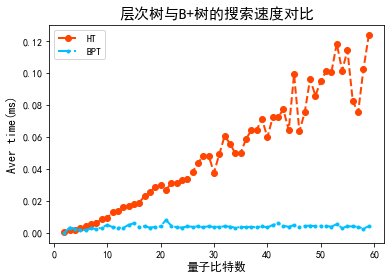

In [61]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_rows', None)  # 显示所有行
plt.plot(qubit_numbers,HT_times, label="HT", linewidth=2,color = "orangered",linestyle = "--",marker = "o")
plt.plot(qubit_numbers,BPT_times,  label="BPT", linewidth=2, color = "deepskyblue",linestyle = '-.', marker = ".")
plt.legend()
plt.title("层次树与B+树的搜索速度对比", fontsize=15)
plt.xlabel("量子比特数", fontsize=12)
plt.ylabel("Aver time(ms)", fontsize=12)
plt.show()


#### with log

<ipython-input-62-f994da0fdf86>:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(qubit_numbers,np.log(BPT_times), label="BPT", linewidth=2, color = "deepskyblue",linestyle = '-', marker = ".")


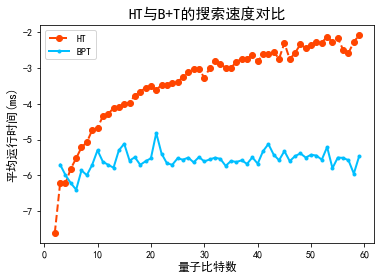

In [62]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_rows', None)  # 显示所有行
plt.plot(qubit_numbers,np.log(HT_times), label="HT", linewidth=2,color = "orangered",linestyle = "--",marker = "o")
plt.plot(qubit_numbers,np.log(BPT_times), label="BPT", linewidth=2, color = "deepskyblue",linestyle = '-', marker = ".")
plt.legend()
plt.title("HT与B+T的搜索速度对比", fontsize=15)
plt.xlabel("量子比特数", fontsize=12)
plt.ylabel("平均运行时间(ms)", fontsize=12)
plt.show()

### F time all_ramdom_grpah 

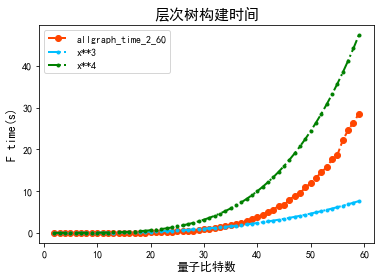

In [90]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_rows', None)  # 显示所有行
x = [i for i in range(2,60)]
a2 = F_allgraph_time_2_60[4]/(3)**3
y2 = [i**3*a2 for i in range(2,60)]
a3 = F_allgraph_time_2_60[4]/(4)**4
y3 = [i**4*a3 for i in range(2,60)]

plt.plot(qubit_numbers_2_60,F_allgraph_time_2_60, label="allgraph_time_2_60", linewidth=2,color = "orangered",linestyle = "--",marker = "o")
plt.plot(x,y2,  label="x**3", linewidth=2, color = "deepskyblue",linestyle = '-.', marker = ".")
plt.plot(x,y3,  label="x**4", linewidth=2, color = "green",linestyle = '-.', marker = ".")
plt.legend()
plt.title("层次树构建时间", fontsize=15)
plt.xlabel("量子比特数", fontsize=12)
plt.ylabel("F time(s)", fontsize=12)
plt.show()


0.0010001659393310547

### Search time single_ramdom_grpah 

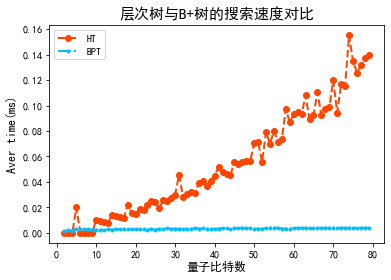

In [33]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_rows', None)  # 显示所有行
plt.plot(qubit_numbers_2_80,HT_times_single_time_2_80, label="HT", linewidth=2,color = "orangered",linestyle = "--",marker = "o")
plt.plot(qubit_numbers_2_80,BPT_times_single_time_2_80,  label="BPT", linewidth=2, color = "deepskyblue",linestyle = '-.', marker = ".")
plt.legend()
plt.title("层次树与B+树的搜索速度对比", fontsize=15)
plt.xlabel("量子比特数", fontsize=12)
plt.ylabel("Aver time(ms)", fontsize=12)
plt.show()


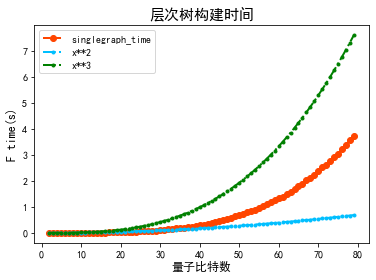

In [97]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_rows', None)  # 显示所有行
x = [i for i in range(2,80)]
a2 = F_singlegraph_time_2_80[4]/(3)**2
y2 = [i**2*a2 for i in range(2,80)]
a3 = F_singlegraph_time_2_80[4]/(4)**3
y3 = [i**3*a3 for i in range(2,80)]

plt.plot(qubit_numbers_2_80,F_singlegraph_time_2_80, label="singlegraph_time", linewidth=2,color = "orangered",linestyle = "--",marker = "o")
plt.plot(x,y2,  label="x**2", linewidth=2, color = "deepskyblue",linestyle = '-.', marker = ".")
plt.plot(x,y3,  label="x**3", linewidth=2, color = "green",linestyle = '-.', marker = ".")
plt.legend()
plt.title("层次树构建时间", fontsize=15)
plt.xlabel("量子比特数", fontsize=12)
plt.ylabel("F time(s)", fontsize=12)
plt.show()
